# Get the Data 

In [1]:
import pandas as pd 
from unidecode import unidecode

def pre_prop(text):
    english_text = unidecode(text)
    return str.replace(english_text, " ", "_").lower()

In [2]:
data = pd.read_csv("../data/fixed_ayd_data.csv",delimiter=';', names=["SidSecenek", "url", "pattern", "BuyerGroup"])
data.head() 

,SidSecenek,url,pattern,BuyerGroup
0,5,https://resim.aydinli.com.tr/02/1/0GU/S4003424...,ÇIZGILI,DOKUMA UST
1,160,https://resim.aydinli.com.tr/08/1/0TH/S3001996...,SAÇ ÖRGÜ,TRIKO
2,297,https://resim.aydinli.com.tr/08/3/0TH/S5008832...,RINGELLI,TRIKO
3,392,https://resim.aydinli.com.tr/08/1/0GU/S3001828...,EKOSE,DOKUMA UST
4,476,https://resim.aydinli.com.tr/02/1/011/S3001786...,JAKARLI,ORME UST


In [3]:
data.pattern = data.pattern.apply(pre_prop) 
data.head() 

,SidSecenek,url,pattern,BuyerGroup
0,5,https://resim.aydinli.com.tr/02/1/0GU/S4003424...,cizgili,DOKUMA UST
1,160,https://resim.aydinli.com.tr/08/1/0TH/S3001996...,sac_orgu,TRIKO
2,297,https://resim.aydinli.com.tr/08/3/0TH/S5008832...,ringelli,TRIKO
3,392,https://resim.aydinli.com.tr/08/1/0GU/S3001828...,ekose,DOKUMA UST
4,476,https://resim.aydinli.com.tr/02/1/011/S3001786...,jakarli,ORME UST


In [7]:
import cv2 
import os 
import requests 
import numpy as np 

def save_image_cv(url, scale_percent, path, size = None):
    resp = requests.get(url, stream=True).raw 
    
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    if image is None: 
        raise TypeError("None type") 
    
    if size == None: 
        width = int(image.shape[1] * scale_percent / 100)
        height = int(image.shape[0] * scale_percent / 100)
        dsize = (width, height)
    else: 
        dsize = size 
    
    output = cv2.resize(image, dsize)
    # output = cv2.cvtColor(output, cv2.COLOR_BGR2RGB) it is already in RGB Format  

    return cv2.imwrite(path, output)


def make_dataset_cv(dataset_name, datasource, iteration = None, set_name="all"):
    problems_rows = []
    iterator = 0 
    try:
        base = os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), '.'))
        path = os.path.join('data', dataset_name)
        path = os.path.join(base, path)
        if not os.path.isdir(path):
            os.mkdir(path)
                
        folder_set = os.path.join(path, set_name) 
        if not os.path.isdir(folder_set):
            os.mkdir(folder_set) 
    
        for img_index, img_row in datasource.iterrows():
                try:
                    ug_folder = os.path.join(folder_set, img_row["pattern"]) 
                    if not os.path.isdir(ug_folder): 
                        os.mkdir(ug_folder) 
                    
                    if save_image_cv(img_row['url'], 
                                     75, 
                                     os.path.join(ug_folder, str(img_index) + '.png'), 
                                     size=(720, 720)
                                     ) == False:
                        problems_rows.append(img_row)

                    if iteration is not None and iterator == iteration:
                        break
                    else:
                        iterator+=1
                        if iterator % 1000 == 0: 
                            print(f"Iteration {iterator}") 
                            
                except Exception as e2:
                    problems_rows.append(img_row)
                    print(e2)
                    continue
    except Exception as e:
        print('An exception occurred.', e)
    return problems_rows

In [8]:
errors = make_dataset_cv("fixed_ayd", data)

Iteration 1000
Iteration 2000
Iteration 3000
None type
Iteration 4000
Iteration 5000
Iteration 6000
Iteration 7000
Iteration 8000
Iteration 9000
Iteration 10000
Iteration 11000
Iteration 12000
Iteration 13000
Iteration 14000
Iteration 15000
Iteration 16000
None type
None type
None type
Iteration 17000
Iteration 18000
Iteration 19000
None type
Iteration 20000
Iteration 21000
Iteration 22000
Iteration 23000
Iteration 24000
None type
Iteration 25000
Iteration 26000
Iteration 27000
Iteration 28000


In [11]:
# pd.DataFrame(errors).to_csv("../data/fixed_ayd_errors.csv")

# Split the Data 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.url, data.pattern, test_size=0.2, random_state=47)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=47)

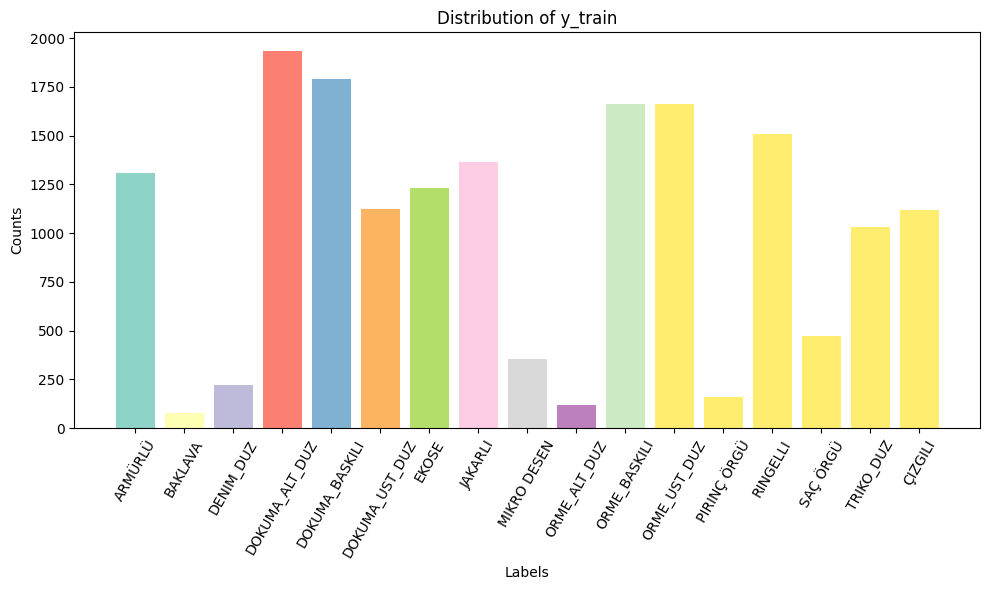

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np 

unique_labels, label_counts = np.unique(y_train, return_counts=True)
color_palette = plt.get_cmap('Set3')  # Choose a colormap
plt.figure(figsize=(10, 6))
bars = plt.bar(unique_labels, label_counts, color=color_palette(range(len(unique_labels))))
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.title('Distribution of y_train')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

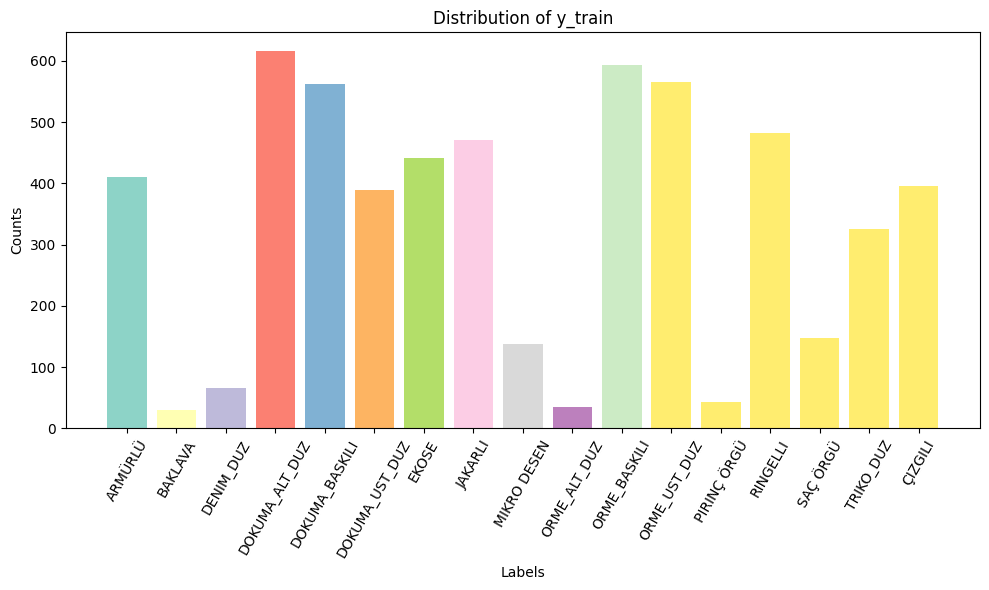

In [ ]:
unique_labels, label_counts = np.unique(y_test, return_counts=True)
color_palette = plt.get_cmap('Set3')  # Choose a colormap
plt.figure(figsize=(10, 6))
bars = plt.bar(unique_labels, label_counts, color=color_palette(range(len(unique_labels))))
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.title('Distribution of y_train')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

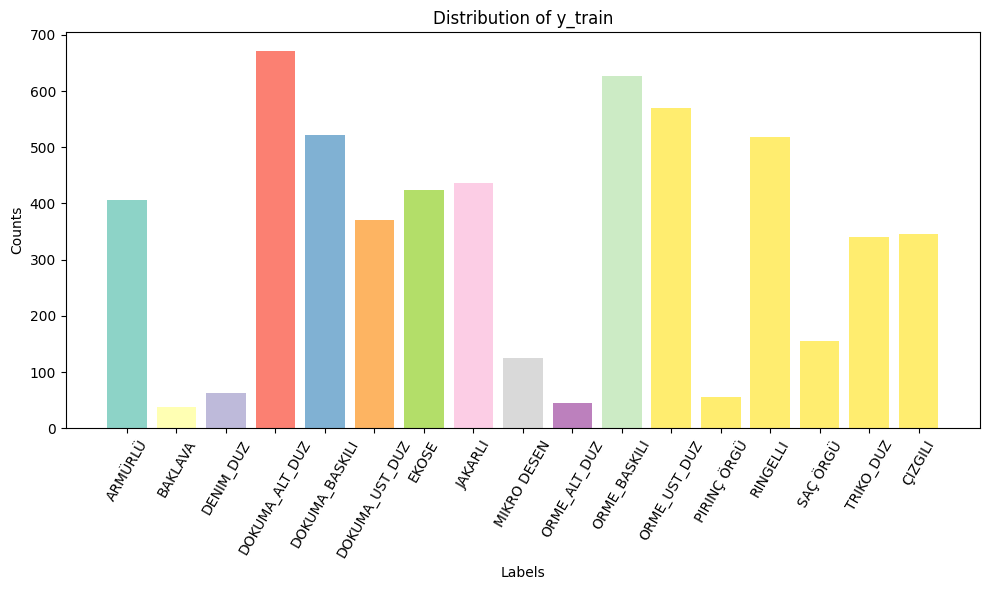

In [ ]:
unique_labels, label_counts = np.unique(y_val, return_counts=True)
color_palette = plt.get_cmap('Set3')  # Choose a colormap
plt.figure(figsize=(10, 6))
bars = plt.bar(unique_labels, label_counts, color=color_palette(range(len(unique_labels))))
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.title('Distribution of y_train')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

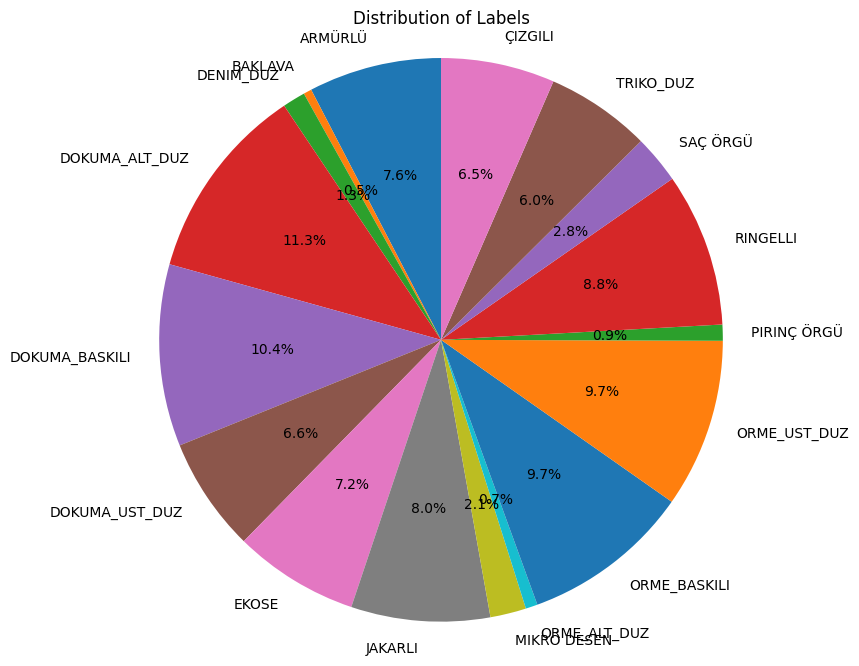

In [ ]:
unique_labels, label_counts = np.unique(y_train, return_counts=True)
plt.figure(figsize=(8, 8))  
plt.pie(label_counts, labels=unique_labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Labels')
plt.axis('equal') 
plt.show()